In [1]:
import pandas as pd
import numpy as np 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
path = "D:/MCGILL-DATA SCIENCE/YCBS-299-PRJ/data/jjycleaned/"

In [2]:
incident_crime_weather = path + "incident_crime_weather.csv"
incident_crime_weather= pd.read_csv(incident_crime_weather)
incident_crime_weather.sort_values(['DATE']).head()

,DATE,YEAR,QUART,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,ARRONDISSEMENT,FIRE_RISK_RATE_YR,RISK_LVL,CATEGORIE,Temp_avg,Dew_avg,Hum_avg,Wind_avg
6626,2015-01-01,2015,jour,10-22 avec feu,INCENDIE,MERCIER-HOCHELAGA-MAISONNEUVE,0.080714,High,Méfait,-3.82,-7.74,74.75,27.75
10682,2015-01-01,2015,soir,10-22 avec feu,INCENDIE,WESTMOUNT,0.008496,Low,NaN,-3.47,-6.09,82.14,23.71
6509,2015-01-01,2015,nuit,10-22 avec feu,INCENDIE,MERCIER-HOCHELAGA-MAISONNEUVE,0.080714,High,Méfait,-6.52,-11.80,66.67,21.78
6628,2015-01-01,2015,jour,10-22 avec feu,INCENDIE,MERCIER-HOCHELAGA-MAISONNEUVE,0.080714,High,Introduction,-3.82,-7.74,74.75,27.75
6627,2015-01-01,2015,jour,10-22 avec feu,INCENDIE,MERCIER-HOCHELAGA-MAISONNEUVE,0.080714,High,Introduction,-3.82,-7.74,74.75,27.75


In [3]:
print(incident_crime_weather.corr())

                       YEAR  FIRE_RISK_RATE_YR  Temp_avg   Dew_avg   Hum_avg  \
YEAR               1.000000           0.049396 -0.007797 -0.009886  0.003330   
FIRE_RISK_RATE_YR  0.049396           1.000000  0.046496  0.042855 -0.010807   
Temp_avg          -0.007797           0.046496  1.000000  0.936120 -0.221420   
Dew_avg           -0.009886           0.042855  0.936120  1.000000  0.112915   
Hum_avg            0.003330          -0.010807 -0.221420  0.112915  1.000000   
Wind_avg          -0.012861           0.041189 -0.054841 -0.073418 -0.028988   

                   Wind_avg  
YEAR              -0.012861  
FIRE_RISK_RATE_YR  0.041189  
Temp_avg          -0.054841  
Dew_avg           -0.073418  
Hum_avg           -0.028988  
Wind_avg           1.000000  


In [4]:
incident_crime_weather.isnull().sum()

DATE                     0
YEAR                     0
QUART                    0
INCIDENT_TYPE_DESC       0
DESCRIPTION_GROUPE       0
ARRONDISSEMENT           0
FIRE_RISK_RATE_YR        0
RISK_LVL                 0
CATEGORIE             2334
Temp_avg                 0
Dew_avg                  0
Hum_avg                  0
Wind_avg                 0
dtype: int64

In [5]:
incident_crime_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 13 columns):
DATE                  10782 non-null object
YEAR                  10782 non-null int64
QUART                 10782 non-null object
INCIDENT_TYPE_DESC    10782 non-null object
DESCRIPTION_GROUPE    10782 non-null object
ARRONDISSEMENT        10782 non-null object
FIRE_RISK_RATE_YR     10782 non-null float64
RISK_LVL              10782 non-null object
CATEGORIE             8448 non-null object
Temp_avg              10782 non-null float64
Dew_avg               10782 non-null float64
Hum_avg               10782 non-null float64
Wind_avg              10782 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.1+ MB


In [6]:
incident_crime_weather['DATE'] = incident_crime_weather['DATE'].astype('datetime64[ns]') 

## create new features: month and day

In [7]:
incident_crime_weather['MONTH'] = pd.to_datetime(incident_crime_weather['DATE']).dt.month
incident_crime_weather['DAY'] = pd.to_datetime(incident_crime_weather['DATE']).dt.day
incident_crime_weather

,DATE,YEAR,QUART,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,ARRONDISSEMENT,FIRE_RISK_RATE_YR,RISK_LVL,CATEGORIE,Temp_avg,Dew_avg,Hum_avg,Wind_avg,MONTH,DAY
0,2019-01-07,2019,jour,Feu de bâtiment,INCENDIE,POINTE-CLAIRE,0.014108,Low,NaN,-11.94,-20.26,50.62,7.50,1,7
1,2019-01-11,2019,jour,10-22 avec feu,INCENDIE,POINTE-CLAIRE,0.014108,Low,Introduction,-16.12,-22.45,58.25,25.88,1,11
2,2019-09-27,2019,soir,Feu de cuisinière,INCENDIE,POINTE-CLAIRE,0.014108,Low,Introduction,16.96,10.67,66.86,10.00,9,27
3,2019-09-27,2019,soir,Feu de cuisinière,INCENDIE,POINTE-CLAIRE,0.014108,Low,Vol de véhicule à moteur,16.96,10.67,66.86,10.00,9,27
4,2019-01-18,2019,soir,10-22 avec feu,INCENDIE,POINTE-CLAIRE,0.014108,Low,Méfait,-10.34,-13.71,76.29,11.43,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10777,2019-11-13,2019,nuit,Feu de bâtiment,INCENDIE,BEACONSFIELD,0.001660,Low,NaN,-11.71,-16.27,69.00,21.00,11,13
10778,2019-12-10,2019,jour,10-22 avec feu,INCENDIE,BEACONSFIELD,0.001660,Low,NaN,5.96,0.64,69.00,27.50,12,10
10779,2019-07-26,2019,jour,Feu de bâtiment,INCENDIE,L'ILE-BIZARD-SAINTE-GENEVIEVE,0.002490,Low,NaN,27.71,16.72,52.62,15.38,7,26
10780,2019-03-19,2019,jour,Feu de bâtiment,INCENDIE,L'ILE-BIZARD-SAINTE-GENEVIEVE,0.002490,Low,NaN,-1.70,-14.70,36.50,11.88,3,19


In [20]:
incident_crime_weather = incident_crime_weather[['YEAR','MONTH','DAY', 'QUART','INCIDENT_TYPE_DESC','DESCRIPTION_GROUPE','ARRONDISSEMENT', 'FIRE_RISK_RATE_YR','RISK_LVL','CATEGORIE']]

In [21]:
incident_crime_weather

,YEAR,MONTH,DAY,QUART,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,ARRONDISSEMENT,FIRE_RISK_RATE_YR,RISK_LVL,CATEGORIE
0,2019,1,7,jour,Feu de bâtiment,INCENDIE,POINTE-CLAIRE,0.014108,Low,NaN
1,2019,1,11,jour,10-22 avec feu,INCENDIE,POINTE-CLAIRE,0.014108,Low,Introduction
2,2019,9,27,soir,Feu de cuisinière,INCENDIE,POINTE-CLAIRE,0.014108,Low,Introduction
3,2019,9,27,soir,Feu de cuisinière,INCENDIE,POINTE-CLAIRE,0.014108,Low,Vol de véhicule à moteur
4,2019,1,18,soir,10-22 avec feu,INCENDIE,POINTE-CLAIRE,0.014108,Low,Méfait
...,...,...,...,...,...,...,...,...,...,...
10777,2019,11,13,nuit,Feu de bâtiment,INCENDIE,BEACONSFIELD,0.001660,Low,NaN
10778,2019,12,10,jour,10-22 avec feu,INCENDIE,BEACONSFIELD,0.001660,Low,NaN
10779,2019,7,26,jour,Feu de bâtiment,INCENDIE,L'ILE-BIZARD-SAINTE-GENEVIEVE,0.002490,Low,NaN
10780,2019,3,19,jour,Feu de bâtiment,INCENDIE,L'ILE-BIZARD-SAINTE-GENEVIEVE,0.002490,Low,NaN


## Encoding related categorical variables with dummy varaibles

In [22]:
# generate binary values using get_dummies
model1 = pd.get_dummies(incident_crime_weather, columns=["QUART",'CATEGORIE'])

In [23]:
model1 = model1.drop(columns=['INCIDENT_TYPE_DESC','DESCRIPTION_GROUPE','ARRONDISSEMENT','FIRE_RISK_RATE_YR'], inplace=False)

In [24]:
model1

,YEAR,MONTH,DAY,RISK_LVL,QUART_jour,QUART_nuit,QUART_soir,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés
0,2019,1,7,Low,1,0,0,0,0,0,0,0,0
1,2019,1,11,Low,1,0,0,0,1,0,0,0,0
2,2019,9,27,Low,0,0,1,0,1,0,0,0,0
3,2019,9,27,Low,0,0,1,0,0,0,0,1,0
4,2019,1,18,Low,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10777,2019,11,13,Low,0,1,0,0,0,0,0,0,0
10778,2019,12,10,Low,1,0,0,0,0,0,0,0,0
10779,2019,7,26,Low,1,0,0,0,0,0,0,0,0
10780,2019,3,19,Low,1,0,0,0,0,0,0,0,0


## split data set

In [25]:
train = model1.loc[model2['YEAR']< 2019]
train.groupby(['YEAR']).count()
test = model1.loc[model2['YEAR']== 2019]
test.groupby(['YEAR']).count()

,MONTH,DAY,RISK_LVL,QUART_jour,QUART_nuit,QUART_soir,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés
YEAR,,,,,,,,,,,,
2015,2205,2205,2205,2205,2205,2205,2205,2205,2205,2205,2205,2205
2016,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
2017,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283
2018,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027


,MONTH,DAY,RISK_LVL,QUART_jour,QUART_nuit,QUART_soir,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés
YEAR,,,,,,,,,,,,
2019,2108,2108,2108,2108,2108,2108,2108,2108,2108,2108,2108,2108


In [26]:
y_train = train['RISK_LVL']
X_train= train.drop(columns=['RISK_LVL'], inplace=False)
y_train

59       Medium
60       Medium
61       Medium
62       Medium
63       Medium
          ...  
10772       Low
10773       Low
10774       Low
10775       Low
10776       Low
Name: RISK_LVL, Length: 8674, dtype: object

In [27]:
X_train

,YEAR,MONTH,DAY,QUART_jour,QUART_nuit,QUART_soir,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés
59,2016,1,20,0,1,0,0,0,0,0,0,0
60,2016,3,10,1,0,0,0,0,0,0,1,0
61,2016,3,24,0,0,1,0,0,0,0,0,0
62,2016,3,22,0,1,0,0,0,0,0,1,0
63,2016,7,21,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10772,2016,3,8,0,0,1,0,0,0,1,0,0
10773,2016,6,19,0,1,0,0,1,0,0,0,0
10774,2016,1,20,1,0,0,0,0,0,0,0,0
10775,2016,11,29,0,1,0,0,0,0,0,0,0


In [28]:
y_test = test['RISK_LVL']
X_test= test.drop(columns=['RISK_LVL'], inplace=False)
X_test,y_test 

(       YEAR  MONTH  DAY  QUART_jour  QUART_nuit  QUART_soir  \
 0      2019      1    7           1           0           0   
 1      2019      1   11           1           0           0   
 2      2019      9   27           0           0           1   
 3      2019      9   27           0           0           1   
 4      2019      1   18           0           0           1   
 ...     ...    ...  ...         ...         ...         ...   
 10777  2019     11   13           0           1           0   
 10778  2019     12   10           1           0           0   
 10779  2019      7   26           1           0           0   
 10780  2019      3   19           1           0           0   
 10781  2019     12   24           0           0           1   
 
        CATEGORIE_Infractions entrainant la mort  CATEGORIE_Introduction  \
 0                                             0                       0   
 1                                             0                       1   
 2

## LogisticRegression

In [29]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
logreg = log.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4454459203036053


D:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Feature: 0, Score: -0.00093
Feature: 1, Score: 0.00089
Feature: 2, Score: -0.00279
Feature: 3, Score: -0.19368
Feature: 4, Score: 0.27806
Feature: 5, Score: -0.07715
Feature: 6, Score: 0.05840
Feature: 7, Score: 2.11743
Feature: 8, Score: 1.93722
Feature: 9, Score: 2.27966
Feature: 10, Score: 1.53178
Feature: 11, Score: 2.27480


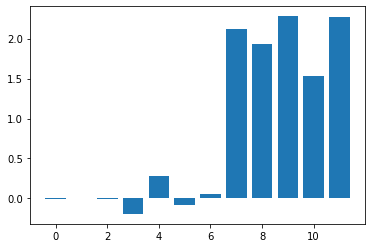

In [36]:
from matplotlib import pyplot
importance = log.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
show = pyplot.bar([x for x in range(len(importance))], importance)

## DECISION TREE CLASSIFIER

In [31]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
# fit the model
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy: 0.3932637571157495


Feature: 0, Score: 0.07155
Feature: 1, Score: 0.28938
Feature: 2, Score: 0.41588
Feature: 3, Score: 0.03512
Feature: 4, Score: 0.02406
Feature: 5, Score: 0.03241
Feature: 6, Score: 0.00057
Feature: 7, Score: 0.02906
Feature: 8, Score: 0.02889
Feature: 9, Score: 0.01577
Feature: 10, Score: 0.03440
Feature: 11, Score: 0.02289


<BarContainer object of 12 artists>

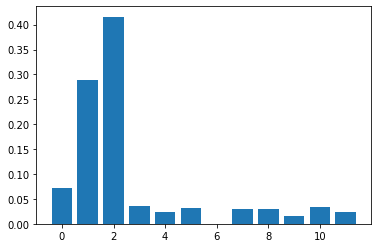

In [32]:
from matplotlib import pyplot
# get importance
importance = dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

In [33]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("dtree_less_feature") 

'dtree_less_feature.pdf'

[Text(177.6688985062505, 213.93290322580646, 'X[0] <= 2016.5\ngini = 0.651\nsamples = 8674\nvalue = [3746, 2284, 2644]'),
 Text(111.44162081676109, 206.91870967741934, 'X[0] <= 2015.5\ngini = 0.627\nsamples = 4364\nvalue = [2161, 1071, 1132]'),
 Text(78.52322779468257, 199.90451612903226, 'X[4] <= 15.27\ngini = 0.643\nsamples = 2205\nvalue = [1008, 559, 638]'),
 Text(75.41382673386283, 192.89032258064515, 'X[4] <= 15.125\ngini = 0.65\nsamples = 1905\nvalue = [832, 492, 581]'),
 Text(71.98046432156804, 185.87612903225806, 'X[6] <= 30.0\ngini = 0.649\nsamples = 1891\nvalue = [830, 492, 569]'),
 Text(65.65813896173901, 178.86193548387098, 'X[6] <= 22.535\ngini = 0.648\nsamples = 1842\nvalue = [819, 481, 542]'),
 Text(57.85779285428647, 171.84774193548387, 'X[6] <= 21.82\ngini = 0.653\nsamples = 1603\nvalue = [681, 426, 496]'),
 Text(47.84711910175372, 164.83354838709678, 'X[5] <= 78.615\ngini = 0.65\nsamples = 1558\nvalue = [679, 401, 478]'),
 Text(36.085332226102665, 157.81935483870967, 

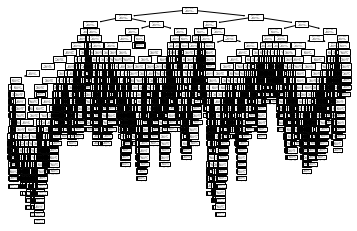

In [25]:
tree.plot_tree(dtree)

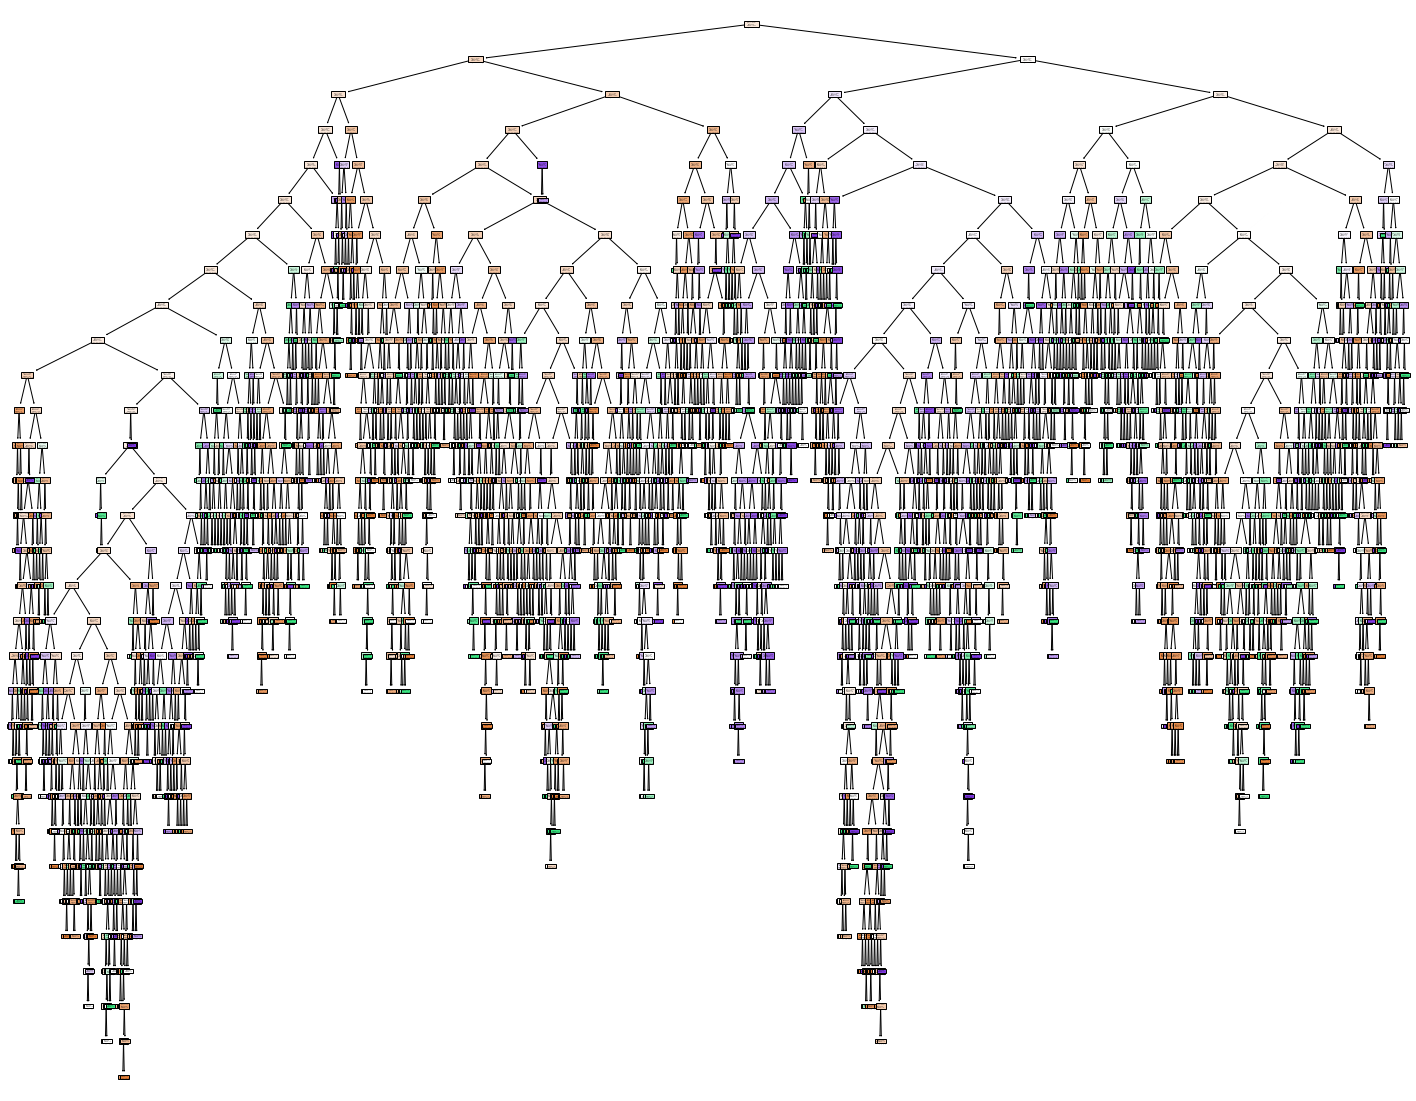

In [26]:
fig = pyplot.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   filled=True)

## random forest

In [34]:
# random forest for feature importance on a regression problem

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
randomtree = RandomForestClassifier()
# fit the model
randomtree.fit(X_train, y_train)

y_pred = randomtree.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

D:\anacoda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.38282732447817835


Feature: 0, Score: 0.07284
Feature: 1, Score: 0.27758
Feature: 2, Score: 0.48923
Feature: 3, Score: 0.00890
Feature: 4, Score: 0.00737
Feature: 5, Score: 0.00878
Feature: 6, Score: 0.00036
Feature: 7, Score: 0.03185
Feature: 8, Score: 0.03831
Feature: 9, Score: 0.03540
Feature: 10, Score: 0.01813
Feature: 11, Score: 0.01123


<BarContainer object of 12 artists>

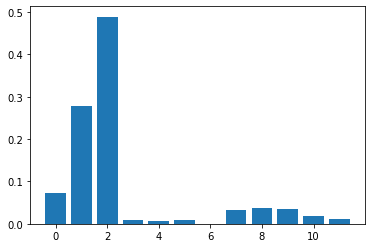

In [35]:
# get importance
importance = randomtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Gradient Boosting Classifier

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train_df = pd.DataFrame(X_train)

In [43]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 12 columns):
0     8674 non-null float64
1     8674 non-null float64
2     8674 non-null float64
3     8674 non-null float64
4     8674 non-null float64
5     8674 non-null float64
6     8674 non-null float64
7     8674 non-null float64
8     8674 non-null float64
9     8674 non-null float64
10    8674 non-null float64
11    8674 non-null float64
dtypes: float64(12)
memory usage: 813.3 KB


In [44]:
X_test

array([[1.33333333, 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 0.72727273, 0.86666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.33333333, 0.54545455, 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 0.18181818, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 1.        , 0.76666667, ..., 0.        , 0.        ,
        0.        ]])

In [45]:
X_train
X_test

array([[0.33333333, 0.        , 0.63333333, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.18181818, 0.3       , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.18181818, 0.76666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 0.63333333, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.90909091, 0.93333333, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.63636364, 0.46666667, ..., 0.        , 0.        ,
        0.        ]])

array([[1.33333333, 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 0.72727273, 0.86666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.33333333, 0.54545455, 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 0.18181818, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [1.33333333, 1.        , 0.76666667, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
y_train
y_test

59       Medium
60       Medium
61       Medium
62       Medium
63       Medium
          ...  
10772       Low
10773       Low
10774       Low
10775       Low
10776       Low
Name: RISK_LVL, Length: 8674, dtype: object

0        Low
1        Low
2        Low
3        Low
4        Low
        ... 
10777    Low
10778    Low
10779    Low
10780    Low
10781    Low
Name: RISK_LVL, Length: 2108, dtype: object

In [47]:
lr_list = [0.1,0.2,0.3,0.5]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=12, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=12,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.1
Accuracy score (training): 0.442
Accuracy score (test): 0.333


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=12,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.2
Accuracy score (training): 0.510
Accuracy score (test): 0.460


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=12,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.3
Accuracy score (training): 0.548
Accuracy score (test): 0.463


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=12,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.5
Accuracy score (training): 0.560
Accuracy score (test): 0.462


In [48]:
predictions = gb_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[570  28  68]
 [226 301 104]
 [546 162 103]]
Classification Report
              precision    recall  f1-score   support

        High       0.42      0.86      0.57       666
         Low       0.61      0.48      0.54       631
      Medium       0.37      0.13      0.19       811

    accuracy                           0.46      2108
   macro avg       0.47      0.49      0.43      2108
weighted avg       0.46      0.46      0.41      2108



Feature: 0, Score: 0.14880
Feature: 1, Score: 0.01866
Feature: 2, Score: 0.02053
Feature: 3, Score: 0.01079
Feature: 4, Score: 0.00699
Feature: 5, Score: 0.00604
Feature: 6, Score: 0.00044
Feature: 7, Score: 0.23362
Feature: 8, Score: 0.12842
Feature: 9, Score: 0.26809
Feature: 10, Score: 0.06626
Feature: 11, Score: 0.09136


<BarContainer object of 12 artists>

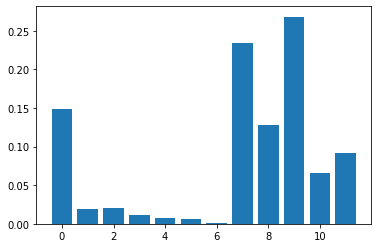

In [49]:
# get importance
importance = gb_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## SVM support vector machine

In [50]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',gamma=0.001)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[575  28  63]
 [236 301  94]
 [552 162  97]]
              precision    recall  f1-score   support

        High       0.42      0.86      0.57       666
         Low       0.61      0.48      0.54       631
      Medium       0.38      0.12      0.18       811

    accuracy                           0.46      2108
   macro avg       0.47      0.49      0.43      2108
weighted avg       0.46      0.46      0.41      2108



In [52]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

show =pd.Series(abs(svclassifier.coef_[0]), index=X_train.columns).nlargest(10).plot(kind='barh')

Accuracy: 0.4615749525616698


AttributeError: 'numpy.ndarray' object has no attribute 'columns'